<a href="https://colab.research.google.com/github/sonluongvu/Palm_structure/blob/main/Rattus_norvegisus_primary_Structure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download neccessary package

In [1]:
! pip install biopython
! pip install logomaker

     |████████████████████████████████| 2.3 MB 14.0 MB/s 
     |████████████████████████████████| 11.8 MB 9.3 MB/s 


Getting alignment files

In [2]:
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/Rattus_norvegicus/alignments.fasta'
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/Rattus_norvegicus/downstream_alignments.fasta'
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/Rattus_norvegicus/upstream_alignments.fasta'

--2022-01-25 18:33:05--  https://github.com/sonluongvu/Palm_structure/raw/main/Rattus_norvegicus/alignments.fasta
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sonluongvu/Palm_structure/main/Rattus_norvegicus/alignments.fasta [following]
--2022-01-25 18:33:05--  https://raw.githubusercontent.com/sonluongvu/Palm_structure/main/Rattus_norvegicus/alignments.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38126 (37K) [text/plain]
Saving to: ‘alignments.fasta’

alignments.fasta    100%[===================>]  37.23K  --.-KB/s    in 0.001s  

2022-01-25 18:33:05 (51.8 MB/s) - ‘alignments.fasta’

Import libraries

In [3]:
import pandas as pd
import numpy as np
from Bio import AlignIO
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import logomaker as lm

Parse alignment files

In [4]:
alignment = AlignIO.read(open('/content/alignments.fasta'), 'fasta')
print(alignment[:5])

Alignment with 5 rows and 201 columns
DQQNCTMKFGSWTYDKAKIDLVSMHSRVDQLDFWESGEWVIVDA...CRR SPALMS53
--------------------------------------------...RST SPALMS57
--------------------------------------------...QEY SPALMS58
--------------------------------------------...EAI SPALMS59
VTIGSGKVFASTGYGIAIQKDSGWKRQVDLAILQLFGDGEMEEL...KSY SPALMS222


Extracting sequences from alignment (15 aa upstream and downstream)

In [5]:
alignment_seq = []
for record in alignment:
  alignment_seq.append(str(record.seq)[85:116])
len(alignment_seq[1])

31

Create matrix from alignment sequence

In [6]:
counts_mat = lm.alignment_to_matrix(sequences=alignment_seq, to_type='probability', characters_to_ignore='.-X')
counts_mat.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.135714,0.021429,0.050000,0.100000,0.042857,0.071429,0.021429,0.071429,0.057143,0.107143,0.021429,0.050000,0.042857,0.007143,0.035714,0.035714,0.035714,0.035714,0.021429,0.035714
1,0.057143,0.007143,0.042857,0.050000,0.028571,0.050000,0.028571,0.114286,0.092857,0.057143,0.042857,0.085714,0.057143,0.028571,0.042857,0.085714,0.035714,0.035714,0.021429,0.035714
2,0.114286,0.007143,0.014286,0.028571,0.028571,0.057143,0.007143,0.028571,0.150000,0.121429,0.021429,0.050000,0.064286,0.028571,0.035714,0.107143,0.064286,0.050000,0.014286,0.007143
3,0.098592,0.021127,0.049296,0.070423,0.035211,0.056338,0.014085,0.070423,0.084507,0.147887,0.084507,0.056338,0.021127,0.021127,0.056338,0.049296,0.007042,0.021127,0.028169,0.007042
4,0.125000,0.020833,0.041667,0.027778,0.020833,0.013889,0.013889,0.048611,0.069444,0.062500,0.027778,0.055556,0.055556,0.020833,0.048611,0.076389,0.069444,0.097222,0.076389,0.027778


Create logo matrix

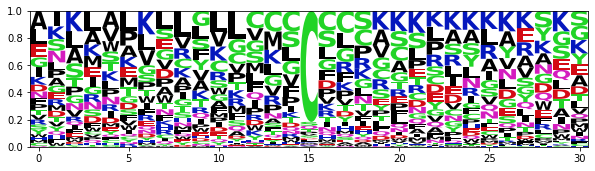

In [7]:
lm.Logo(counts_mat)